In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [28]:
import os
# !pwd
from pathlib import Path
dir_path = Path(r"/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping/")
if dir_path.exists():
    os.chdir(dir_path)
else:
    print("Directory does not exist! Please check the path.")

RandomForest_palisades_sar_avg_asc_desc_glcm.pkl
[13.42045458 13.20696207  3.81434924 21.47959496 30.6395696   6.63175845
  7.82504615  2.98226495]
RandomForest_palisades_sar_single_asc_desc_glcm.pkl
[ 6.33555558 21.6486878   6.95064537 48.63185568  7.63148478  3.3384258
  2.78084637  2.68249861]


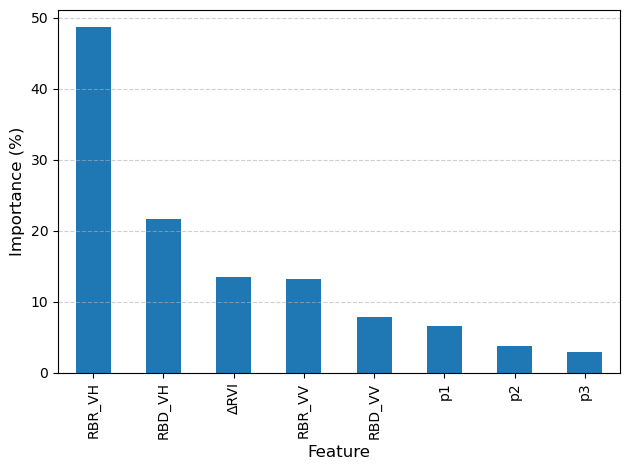

In [ ]:
model_dir="MachineLearning/output/model/"
output_dir="MachineLearning/output/feature_importance/"

import os

model_files = ["RandomForest_palisades_sar_avg_asc_desc_glcm.pkl","RandomForest_palisades_sar_single_asc_desc_glcm.pkl"]
for file in model_files:
    print(file)
    model = joblib.load(model_dir+file)
    if "glcm" in file:
        feature_column_names=["RBD_VV", "RBD_VH", "RBR_VV", "RBR_VH", "ΔRVI", 'p1', 'p2', 'p3']
    else:
        feature_column_names=["RBD_VV", "RBD_VH", "RBR_VV", "RBR_VH", "ΔRVI"]
    print(model.feature_importances_*100)
    feature_importances = pd.Series(model.feature_importances_* 100, index=feature_column_names).sort_values(ascending=False)
    feature_importances.plot.bar()
    plt.ylabel("Importance (%)", fontsize=12)
    plt.xlabel("Feature", fontsize=12)

    # Title (optional)
    plt.title("", fontsize=14)

    # Grid and layout
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(output_dir+file.replace(".pkl",".png"), dpi=300, bbox_inches="tight")  # Change filename & format as needed